## Data Overview

In [2]:
import pandas as pd

df = pd.read_csv(r'..\3. Data Understanding\merged_data.csv', header=0)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    4278 non-null   object 
 1   Target  4280 non-null   float64
 2   Source  4280 non-null   object 
dtypes: float64(1), object(2)
memory usage: 100.4+ KB


,Text,Target,Source
0,Mommy said not to talk to strangers..but she's...,1.0,SchooshooterTexts
1,1.I was immune to getting hurt/killed/infected...,1.0,SchooshooterTexts
2,I mean terrorist attacks happen all the time. ...,1.0,SchooshooterTexts
3,"As a god, it would be my responsibility not to...",1.0,SchooshooterTexts
4,I am going to grab a knife and shove it in the...,1.0,SchooshooterTexts


## Checking for missing values and duplicates

In [3]:
df.isna().sum()

Text      2
Target    0
Source    0
dtype: int64

In [4]:
df['Text'].duplicated().any()

np.True_

## Target Class Distribution

Text(0.5, 1.0, 'Distribution of Target Values')

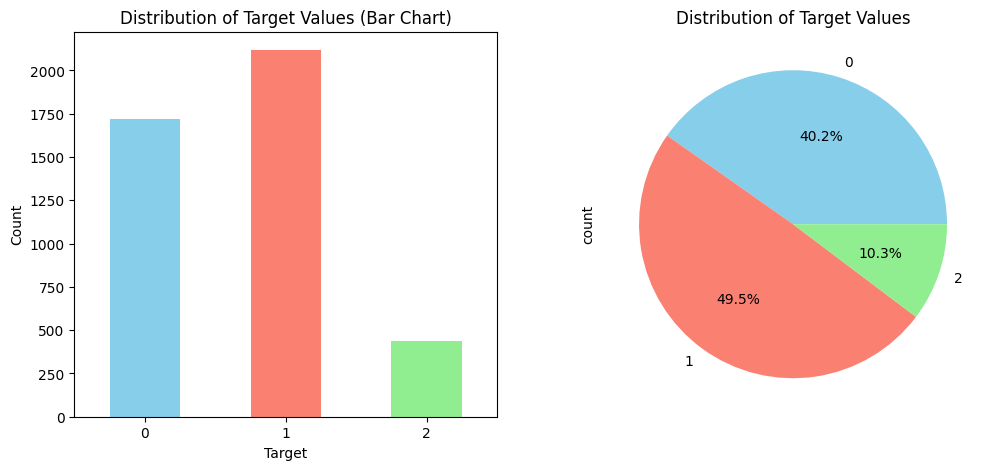

In [5]:
import matplotlib.pyplot as plt

# Bar chart and Pie chart for Target distribution side by side
target_counts = df['Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
target_counts.plot(
    kind='bar',
    color=['skyblue', 'salmon', 'lightgreen'][:len(target_counts)],
    ax=axes[0]
)
axes[0].set_title('Distribution of Target Values (Bar Chart)')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(target_counts)))
axes[0].set_xticklabels(target_counts.index.astype(int), rotation=0)

# Pie chart
target_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=target_counts.index.astype(int),
    colors=['skyblue', 'salmon', 'lightgreen'][:len(target_counts)],
    ax=axes[1]
)
axes[1].set_title('Distribution of Target Values')

## N gram Analysis

### Unigram

In [6]:

from collections import defaultdict
import seaborn as sns
import string

# Separate Classes
data_2 = df[df["Target"] == 2]
data_1 = df[df["Target"] == 1]
data_0 = df[df["Target"] == 0]

# N-gram generation function
def generate_ngrams(text, n_gram=1):
    if not isinstance(text, str):  # Convert non-strings to empty string
        text = ""
    
    
    text = text.translate(str.maketrans('', '', string.punctuation)) # dont count punctuation
    tokens = [word for word in text.lower().split() if word not in STOPWORDS and word != ""]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to count word frequency
def get_top_ngrams(df, top_n, n_gram):
    freq_dict = defaultdict(int)
    for sent in df["Text"]:
        for word in generate_ngrams(sent, n_gram):
            freq_dict[word] += 1
    return pd.DataFrame(freq_dict.items(), columns=["word", "count"]).sort_values(by="count", ascending=False).head(top_n)

# Plot function
def plot_top_words(ax,df, title, color):
    sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
    ax.set_title(title)  # Set title using ax
    ax.set_xlabel("Count")  # Set x-label using ax
    ax.set_ylabel("Words")  # Set y-label using ax

# Get top word
top_words_0 = get_top_ngrams(data_0,30,1 )
top_words_1 = get_top_ngrams(data_1, 30, 1 )
top_words_2 = get_top_ngrams(data_2, 30, 1 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8))
fig.suptitle("Comparison of Top Words in Target Class 0 vs Class 1 vs Class 2", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top Words in Class 0 - Normal", "Greens_r")
plot_top_words(axes[1],top_words_1, "Top Words in Class 1 - Warning Signs", "Blues_r")
plot_top_words(axes[2],top_words_2, "Top Words in Class 2 - Threats", "Reds_r")


plt.tight_layout()
plt.show()

NameError: name 'STOPWORDS' is not defined

### bi gram

C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\288801687

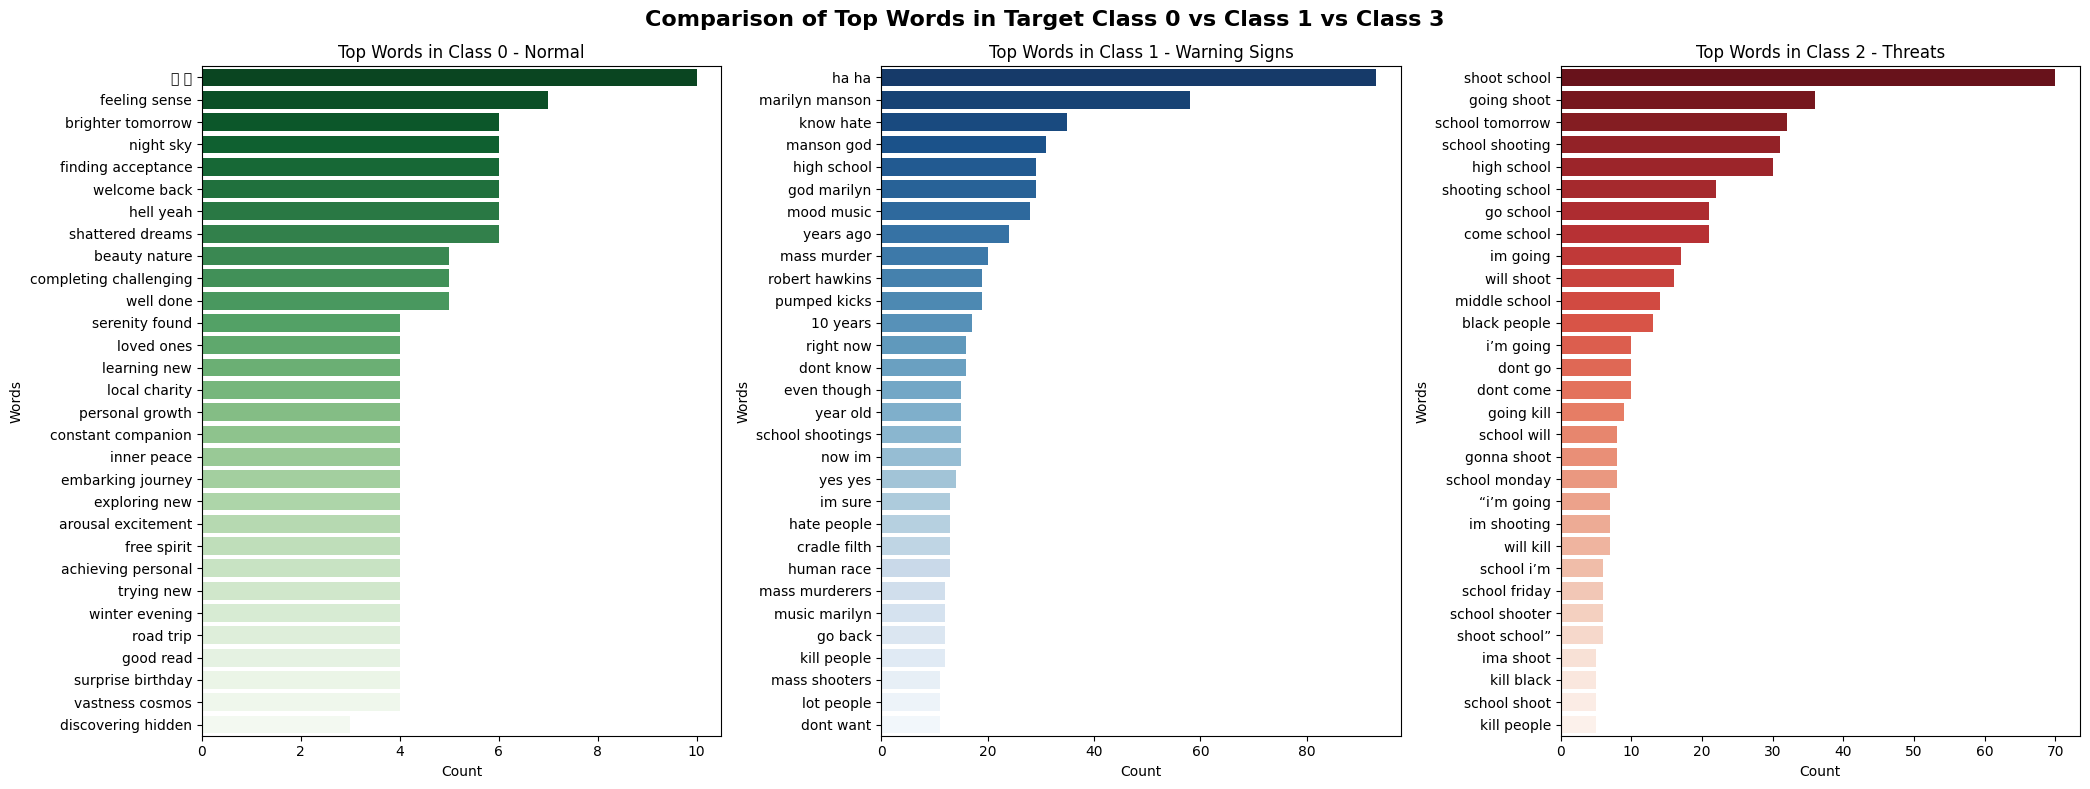

In [ ]:

# Get top word
top_words_0 = get_top_ngrams(data_0,30,2 )
top_words_1 = get_top_ngrams(data_1, 30,2 )
top_words_2 = get_top_ngrams(data_2, 30, 2 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8))
fig.suptitle("Comparison of Top Words in Target Class 0 vs Class 1 vs Class 2", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top Words in Class 0 - Normal", "Greens_r")
plot_top_words(axes[1],top_words_1, "Top Words in Class 1 - Warning Signs", "Blues_r")
plot_top_words(axes[2],top_words_2, "Top Words in Class 2 - Threats", "Reds_r")

plt.tight_layout()
plt.show()

## Tri-grams    

C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\712740415.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_21188\343392705

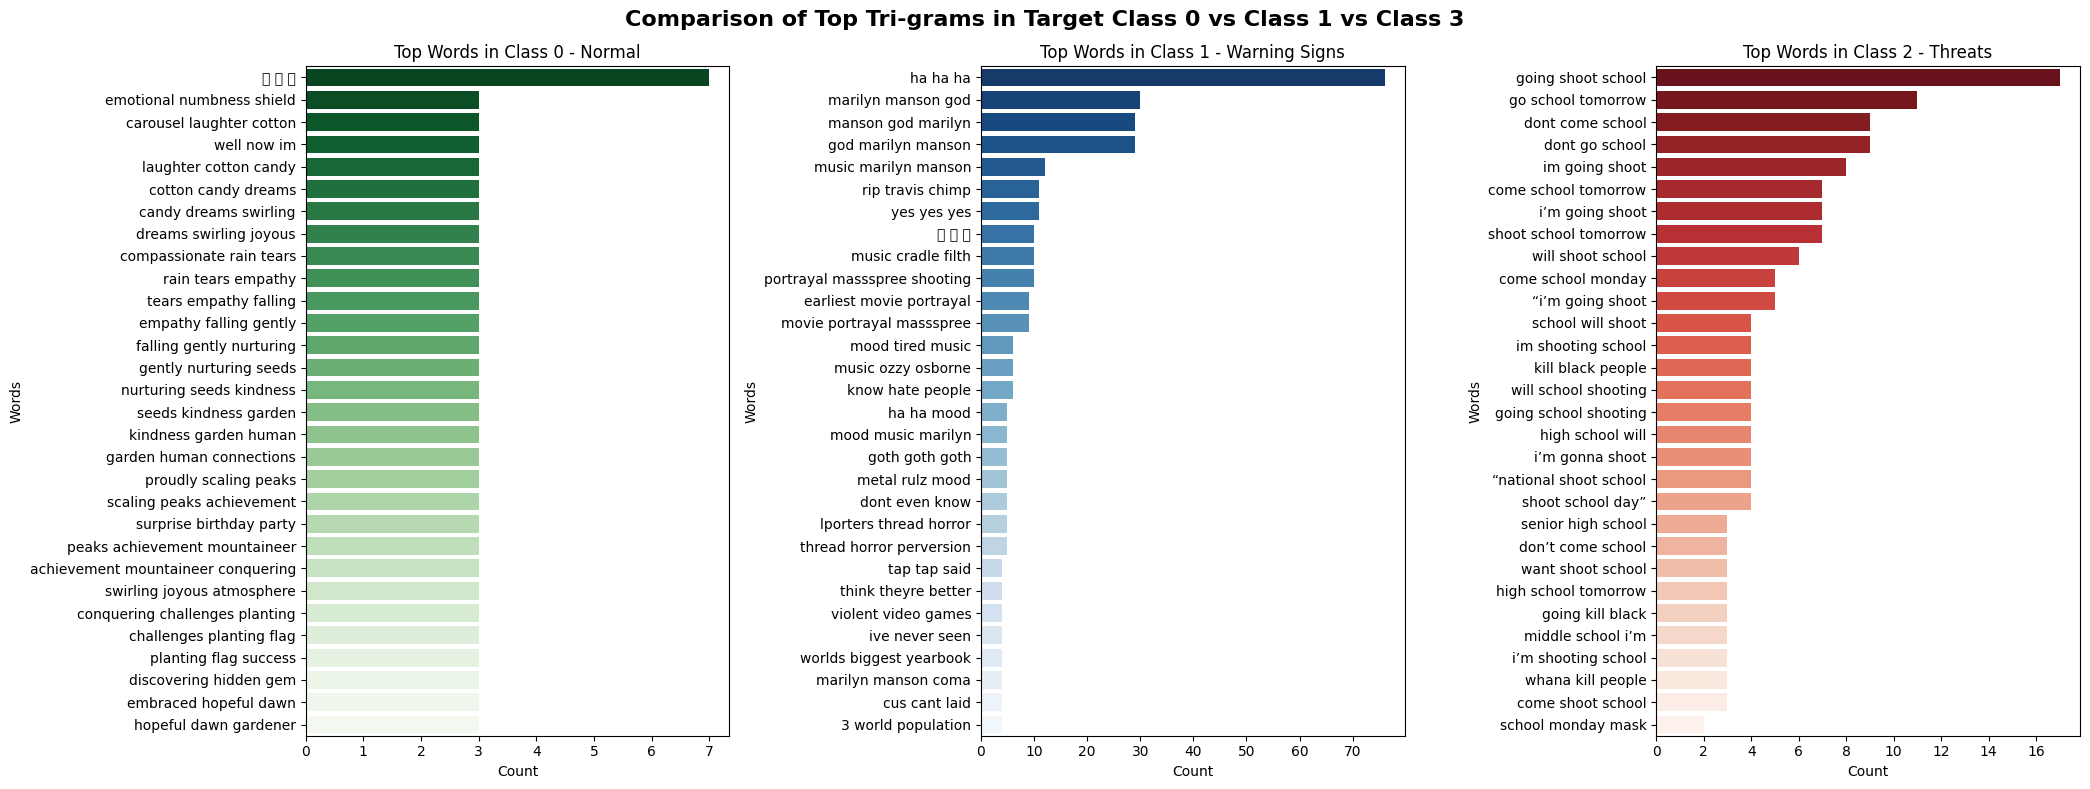

In [ ]:

# Get top word
top_words_0 = get_top_ngrams(data_0,30,3 )
top_words_1 = get_top_ngrams(data_1, 30, 3 )
top_words_2 = get_top_ngrams(data_2, 30, 3 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8))
fig.suptitle("Comparison of Top Tri-grams in Target Class 0 vs Class 1 vs Class 2", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top Words in Class 0 - Normal", "Greens_r")
plot_top_words(axes[1],top_words_1, "Top Words in Class 1 - Warning Signs", "Blues_r")
plot_top_words(axes[2],top_words_2, "Top Words in Class 2 - Threats", "Reds_r")

plt.tight_layout()
plt.show()

## Spell Check

In [ ]:
from spellchecker import SpellChecker
from collections import Counter
import string

spell = SpellChecker()

# Create a translation table that removes all punctuation except '
punct_to_remove = ''.join([c for c in string.punctuation if c != "'"])
# Also remove double quotes (") and left double quote (“) explicitly if not already in string.punctuation
for extra in ['"', '“', '.']:
    if extra not in punct_to_remove:
        punct_to_remove += extra
translator = str.maketrans('', '', punct_to_remove)

all_words = []
df['Text'].dropna().apply(lambda x: all_words.extend(str(x).lower().translate(translator).split()))

misspelled = spell.unknown(all_words)
typo_counter = Counter([word for word in all_words if word in misspelled])

print("Misspelled words and counts:\n")
for word, count in typo_counter.most_common():
    print(f"{word}: {count}")

Misspelled words and counts:

i’m: 88
don’t: 82
it’s: 58
lol: 49
dont: 47
tv: 40
im: 38
lmao: 30
etc: 27
school”: 24
you’re: 23
the…: 22
fuckin: 21
can’t: 20
i…: 20
bro: 18
that’s: 18
t…: 18
thats: 17
…: 17
th…: 17
an…: 16
weise: 15
didn’t: 15
rulz: 15
heil: 14
—: 14
🤠: 14
o…: 14
cuz': 13
vf: 13
ozzy: 13
fav: 13
h…: 13
to…: 13
a…: 13
3rd: 12
🕯: 12
90s: 11
–: 11
yall: 11
isn’t: 11
we’re: 11
b…: 11
y’all: 11
neet: 10
arent: 10
damnit: 10
rammstein: 10
massspree: 10
in…: 10
evangelion: 10
meth: 9
tech: 9
meh: 9
w…: 9
there’s: 9
d…: 9
douchebags: 8
lanza: 8
didnt: 8
glock: 8
cuz: 8
muhahahaha: 8
lporter101: 8
😍: 8
f…: 8
p…: 8
up”: 8
ged: 7
tldr: 7
cho: 7
shithole: 7
cus: 7
usa: 7
rez: 7
altright: 7
won’t: 7
doesn’t: 7
mins: 7
ima: 7
c…: 7
❎: 7
i’ve: 7
with…: 7
m…: 7
instagram: 7
and…: 7
ready”: 7
monday”: 7
ds: 6
2nd: 6
btw: 6
yr: 6
uk: 6
isnt: 6
could've: 6
da: 6
4th: 6
6th: 6
20s: 6
9mm: 6
gta: 6
resisx: 6
what’s: 6
they’re: 6
ak47: 6
regalsin: 6
bonelli: 6
⠀: 6
rt: 6
co…: 6
👦: 6
s…: 6
o

## Language Checking

In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results
DetectorFactory.seed = 42  

# Function to detect language
def detect_language(text):
    try:
        return detect(text) if pd.notna(text) else 'unknown'  # Handle NaN values
    except LangDetectException:
        return 'unknown'  # Handle cases where detection fails

# Apply language detection to text data
df['language'] = df['Text'].apply(detect_language)

# Count occurrences of each language
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Display the table
print(language_counts)

   language  count
0        en   4072
1        de     24
2        so     18
3        nl     18
4        da     18
5        af     14
6        cy     12
7        tl     12
8        fr     12
9   unknown      9
10       it      8
11       sv      7
12       no      7
13       ro      6
14       vi      6
15       pt      5
16       id      5
17       et      4
18       tr      4
19       ca      3
20       fi      3
21       es      2
22       pl      2
23       sq      2
24       sw      2
25       uk      1
26       hu      1
27       sl      1
28       lv      1
29       lt      1


## Emoji Checking

In [ ]:
import emoji

def extract_emojis(text):
    if not isinstance(text, str):
        return []
    return [char for char in text if emoji.is_emoji(char)]

df['Emojis'] = df['Text'].apply(extract_emojis)

all_emojis = sum(df['Emojis'], [])  
emoji_counts = pd.Series(all_emojis).value_counts()

print(emoji_counts)


🤠    14
🕯    12
♥     8
😍     8
❎     7
👦     6
🎵     5
☹     5
👢     4
❤     4
⚪     3
🎶     3
🌱     3
💪     3
⚠     2
✨     2
👇     2
💥     2
🐾     2
🕧     1
😉     1
💇     1
👶     1
🙃     1
🙂     1
🕢     1
🙏     1
😂     1
👌     1
🐦     1
📌     1
📷     1
🎉     1
🎨     1
🎂     1
🐶     1
Name: count, dtype: int64
